In [6]:
import pandas as pd

df = pd.read_csv('dfdf.csv')    #, index_col="UPSOYEAR"
df.head()

,Unnamed: 0,UPSOYEAR,CNT
0,1,10,1
1,2,10,1
2,3,11,2
3,4,11,1
4,5,11,3


In [10]:
df.drop(columns="Unnamed: 0", axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [11]:
df.head()

,UPSOYEAR,CNT
0,10,1
1,10,1
2,11,2
3,11,1
4,11,3


In [12]:
df.corr()

,UPSOYEAR,CNT
UPSOYEAR,1.000000,0.114679
CNT,0.114679,1.000000


In [18]:
import tensorflow.compat.v1 as tf

In [19]:
xData = df.CNT.tolist()     # 횟수
yData = df.UPSOYEAR.tolist()        # 연수
W = tf.Variable(tf.random_uniform([1], -100, 100))
print(W)
b = tf.Variable(tf.random_uniform([1], -100, 100))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W * X + b
cost = tf.reduce_mean(tf.square(H - Y))
a = tf.Variable(0.0001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(2001):
    sess.run(train, feed_dict={X: xData, Y: yData})
    if i % 200 == 0:
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
print(sess.run(H, feed_dict={X: [5]}))

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
0 17624.127 [79.18734] [-29.16818]
200 12051.144 [69.330185] [-32.906277]
400 8329.6 [61.24169] [-35.871517]
600 5842.935 [54.598034] [-38.206352]
800 4179.938 [49.13457] [-40.027103]
1000 3066.3315 [44.635258] [-41.42876]
1200 2319.2207 [40.92368] [-42.488857]
1400 1816.6073 [37.85569] [-43.27075]
1600 1477.1357 [35.31364] [-43.82618]
1800 1246.537 [33.2014] [-44.197376]
2000 1088.6218 [31.440472] [-44.418797]
[112.78357]


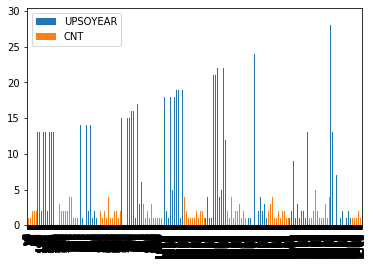

In [13]:
df.plot(kind = 'bar')

In [17]:
df.dtypes()

TypeError: 'Series' object is not callable